# Elements of Statistical Learning

## Chapter 2 - Overview of Supervised Learning

### Section 2.1 - Introduction

* Inputs are also called **predictors**, **features**, or **independent variables**.
* Outputs are also called **responses** or **dependent variables**.

### Section 2.2 - Variable Types and Terminology

**Types of variables**

* Quantitative variables
    * "some measurements are bigger than others"
    * "measurements close in value are close in nature"
    * e.g. stock price, fuel used

* Qualitative variables (sometimes called categoricals, factors, or discrete variables)
    * Assumes a finite set of possible values
    * No explicit ordering
    * Labels (outputs) are often descriptive
    * e.g. species of Iris ($G = {Virginica, Setosa, Versicolor}$), pass/fail, survived/perished.
    
* Ordered categorical variables
    * "There is an ordering between the values, but no metric notion is appropriate"
    * Small/Medium/Large - The difference between Small and Medium need not be the same as that of Medium and Large.
    
**Regression** --> Predict quantitative outputs

**Classification** --> Predict qualitative outputs

**Both regression and classification can be viewed as a task in function approximiation.**

**Qualitative variables are typically represented numerically by codes.**
* When there are only two catgories (e.g. pass/fail) use 0 and 1.
    * These are called _targets_.
* When there are more than two categories, use _dummy variables_.
    * "K-level variable is represented by a vector of K binary variables or bits, only one of which is “on” at a time."
        * (0,0,1) vs (0,1,0) vs (1,0,0)

**Denote an input variable by the symbol $X$.**
* If $X$ is a vector, components denoted by $X_j$.
* Specific observations denoted $x_i$.

**Quantitative outputs will be denoted by $Y$, and qualitative outputs by $G$ for group.**

**Restatement of learning problem**
* Given the value of an input vector $X$, make a good prediction of the output $Y$, denoted by $\hat{Y}$.
    * If $Y$ is a real number value, then $\hat{y}$ should be as well.
    * For categorical outputs, $\hat{G}$ should take values in the same set associated with $G$.
    * Assume we have a set of measurements ($x_i$, $y_i$) or ($x_i$, $g_i$), $i = 1, . . . , N$, known as the training data, with which to construct our prediction model.

### Section 2.3 - Two Simple Approaches to Prediction: Least Squares and Nearest Neighbors
This section develops two powerful prediction methods.
* Linear model fit using least squares
    * Makes "huge" assumptions about structure and yields stable but possibly inaccurate predictions
* _k_-nearest-neighbor prediction rule
    * Makes "mild" assumptions about structure and yields often accurate predictions that can be unstable

#### Section 2.3.1 - Linear Models and Least Squares

Given a vector of inputs $X^{T} = (X_{1},X_{2},X_{3},...,X_{p})$, we predict the output $Y$ as:

$$\hat{Y} = \hat{\beta}_{o} \sum_{j=1}^{p}X_{j}\hat{\beta}_j$$

The term $\hat{\beta}_o$ is the intercept or _bias_.

$\hat{Y}$ can model a single output (a scalar) or it can represent a K-vector.

The most popular method of fitting this model to data is via _least squares_. We pick the coefficients of $\beta$ to minimize the **residual sum of squares** or RSS.

$$ RSS(\beta) = \sum_{i=1}^{N}(y_{i} - x_{i}^{T}\beta)^2 $$

I prefer this to be written as:

$$ Error(model) = \sum_{i=1}^{N}(observed_{i}-predicted_{i})^2 $$

Note that $RSS(\beta)$ is a quadratic function and its minimum always exists but may not be unique.

> We do not need a very large data set to fit such a model.

The entire fitted model is characterized by the slope (sometimes written $\hat{\beta}$ or $m$) and the intercept, ($c$).

From a different source, I saw slope, $m$ and intercept, $c$ written as:

$$ m = \frac{(x_{i}-\bar{x})*(y_{i}-\bar{y})}{(x_{i}-\bar{x})^2} $$

$$ c = \bar{y} - m\bar{x} $$

Where $\bar{x}$ and $\bar{y}$ are the means of the input $x$ and $y$ values respectively.

#### Section 2.3.1 - Example Linear Model in a Classification Context



In this example we will use data that was generated as follows:

* 10 means $m_k$ were drawn from a bivariate Gaussian distribution $\mathcal{N}((1,0),I)$ and labeled BLUE.
* 10 more were drawn from $\mathcal{N}((0,1),I)$, and labeled ORANGE.
* For each class, BLUE and ORANGE, 100 observations were generated as follows:
    * A mean, $m_k$, was picked at random with probability 1/10;
    * An observation was drawn from $\mathcal{N}(m_k,I/5)$, thus leading to a mixture of Gaussian clusters for each class.
* The task is to create a classifier that, based on the coordinates, determines whether the point is ORANGE or BLUE. Of course, the classifier should not be based on then knowledge of how the data was generated.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

%matplotlib inline

In [2]:
# Parameters for mean distributions
mean_blue = [1,0]
mean_orange = [0,1]
mean_cov = np.eye(2)
mean_size = 10

# Additional parameters for blue and orange distributions
sample_cov = mean_cov/5

In [3]:
# Generate 10 random means centered around mean_blue [1,0]
sample_blue_mean = np.random.multivariate_normal(mean_blue,mean_cov,mean_size)

In [4]:
# Generate 10 random means centered around mean_orange [0,1]
sample_orange_mean = np.random.multivariate_normal(mean_orange,mean_cov,mean_size)

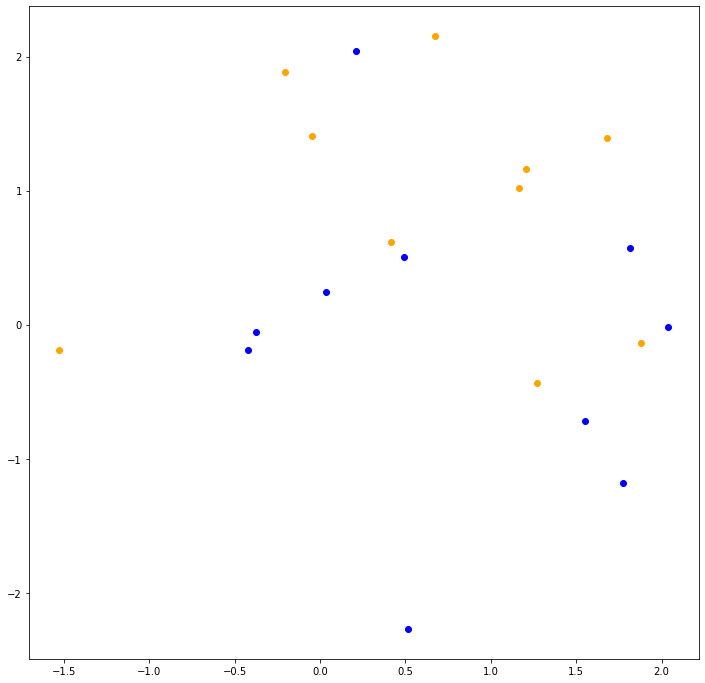

In [5]:
# Plot blue and orange means
plt.figure(figsize=(12, 12))
plt.plot(sample_blue_mean[:,0],sample_blue_mean[:,1],'.',color = 'blue',markersize=12)
plt.plot(sample_orange_mean[:,0],sample_orange_mean[:,1],'.',color = 'orange',markersize=12)
plt.show()

In [6]:
# Generate sample points around means from above
sample_size = 100
blue_points = []
orange_points = []

for _ in range(sample_size):
    # pick a mean at random
    blue_mean = sample_blue_mean[random.randint(0, 9)]
    orange_mean = sample_orange_mean[random.randint(0,9)]
    
    # generate a point around the randomly picked means
    blue_point = np.random.multivariate_normal(blue_mean,sample_cov)
    blue_points.append(blue_point)
    
    orange_point = np.random.multivariate_normal(orange_mean,sample_cov)
    orange_points.append(orange_point)

# convert arrays to numpy arrays    
sample_blue = np.array(blue_points)
sample_orange = np.array(orange_points)

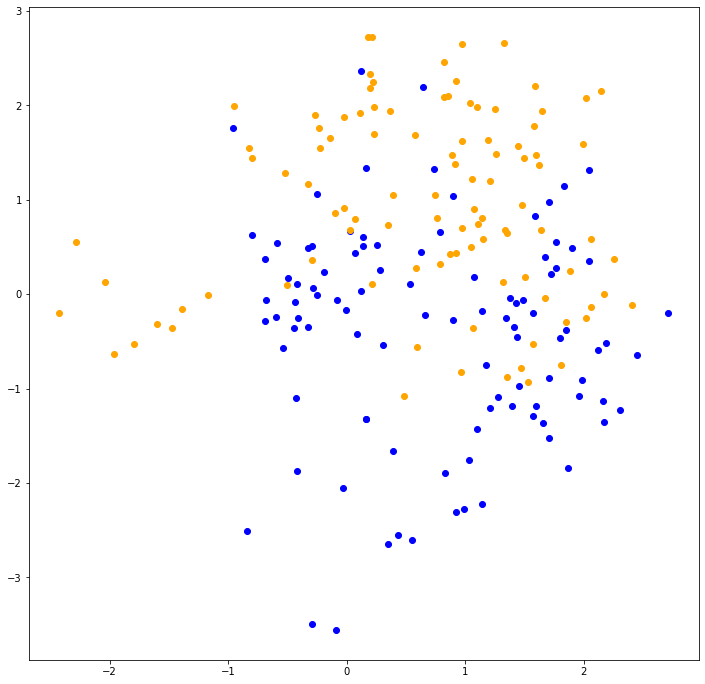

In [7]:
# plot sample blue, sample orange
plt.figure(figsize=(12, 12))
plt.plot(sample_blue[:,0],sample_blue[:,1],'o',color = 'blue')
plt.plot(sample_orange[:,0],sample_orange[:,1],'o',color = 'orange')
plt.show()

In [8]:
# Now we can combine our randomly selected points and assign to each point a class as follows:
#    0 - Blue
#    1 - Orange

# concatenate points - this is the data we will use in prediction so we will call it x
data_x = np.concatenate((sample_blue,sample_orange),axis=0)

# assign classes - this is what we will try to predict so we will call it y
y_blue = [0 for _ in range(sample_size)]
y_orange = [1 for _ in range(sample_size)]

# concatenate groups
data_y = np.concatenate((y_blue,y_orange))

In [9]:
# Now we can do the actual linear regression
# Generate a (200,3) column matrix with 1's in the first column
ones = np.ones((len(data_x),1))

# Add data_x as columns 2 and 3
mat_x = np.hstack((ones,data_x))

# take the transpose of this matrix
mat_xt = np.transpose(mat_x)

# create a column vector with data from y
vec_y = data_y

# Solve (X^T*X)x = X^T*y for x
# let a = X^T*X and b = X^T*y
# so we have ax = b
a = np.matmul(mat_xt, mat_x)
b = np.matmul(mat_xt, vec_y)

# This function solves the equation ax = b for x.
beta = np.linalg.solve(a, b)

In [10]:
# print answers
print("beta[0]\t",beta[0])
print("beta[1]\t",beta[1])
print("beta[2]\t",beta[2])

beta[0]	 0.4537105910130017
beta[1]	 -0.014609119741399659
beta[2]	 0.21149787399768386


* The output class variable $G$ has the values $\textsf{BLUE}$ or $\textsf{ORANGE}$.
* There are 100 points in each of the two classes.
* The linear regression model was fit to these data, with the response $Y$ coded as $0$ for $\textsf{BLUE}$ and $1$ for $\textsf{ORANGE}$.
* The fitted value $\hat{Y}$ are converted to a fitted class variable $\hat{G}$ according to the rule

$$
\hat{G} = \begin{cases}
1 \text{ ORANGE } \text{ if } \hat{Y} \gt 0.5,\\
0 \text{ BLUE } \text{ if } \hat{Y} \le 0.5.
\end{cases}
$$

And the two predicted classes are separated by the decision boundary $\{x: x^T\hat{\beta} = 0.5\}$, which in linear.

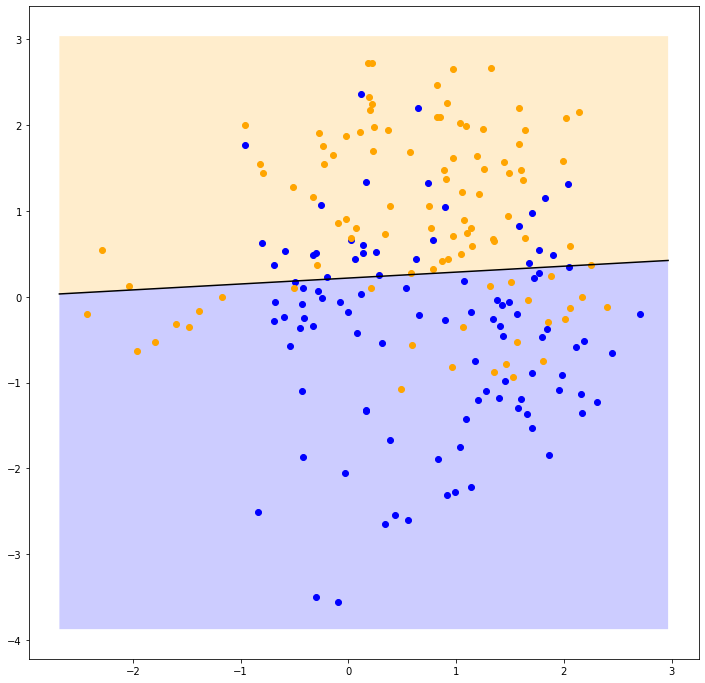

In [11]:
plt.figure(figsize=(12, 12))

plt.plot(sample_blue[:,0],sample_blue[:,1],'o',color = 'blue')
plt.plot(sample_orange[:,0],sample_orange[:,1],'o',color = 'orange')

plot_x_min, plot_x_max = plt.gca().get_xlim()
plot_y_min, plot_y_max = plt.gca().get_ylim()

# plot linear regression line for y_hat = 0.5
ols_line_y_min = (.5 - beta[0] - plot_x_min*beta[1])/beta[2]
ols_line_y_max = (.5 - beta[0] - plot_x_max*beta[1])/beta[2]

plt.plot([plot_x_min, plot_x_max], [ols_line_y_min, ols_line_y_max], color='black')
plt.fill_between([plot_x_min, plot_x_max], [ols_line_y_min, ols_line_y_max], plot_y_max,
                facecolor='orange', alpha=.2)
plt.fill_between([plot_x_min, plot_x_max], [ols_line_y_min, ols_line_y_max], plot_y_min,
                facecolor='blue', alpha=.2)

plt.show()

### Thoughts

* I conceptually understand linear regression.
    * Use or (or more) variables to predict the value of another using a line.
    * That line minimizes the sum of error to observed data points - it represents the best fit of what is known.
* An output $\hat{Y}$ can be predicted as the sum of: a constant, $\hat{\beta_{0}}$ and $p$ products of $X_i$ (the input) and $\hat{\beta{i}}$.
    * The coefficients $\hat{\beta_{0}}$ and $\hat{\beta_{i}}$ are the "outputs" of the least squares minimization.
        * In a single variable example, they are $m$ and $b$ from the equation $y=mx+b$. 
            * $x$ is the observation and $y$ the prediction.
        * The term $\hat{\beta_{0}}$ is sometimes called the _bias_.
    * What would the equation for the response $\hat{Y}$ look like for a two variable example? (e.g. The "input" is described by two variables, $X_{1}$ and $X_{2}$.)
        * Would it be this:  $\hat{Y} = \hat{\beta_{0}} + X_{1}\hat{\beta_{1}} + X_{2}\hat{\beta_{2}}$
        * I think I start to get confused with equation 2.2.
            * > write the linear model in vector form as an inner product
* Equation 2.6 is ultimately the author's method for determining the coefficients of $\beta$.
    * Expressed in matrix notation it is: $\hat{\beta} = (X^T X)^{-1}(X^T y)$
        * Which makes the prediction, $\hat{y_i}$ at any input $x_{i}$ equal to  $\hat{y_i} = x_i^T\hat{\beta}$ 
    * I did something similiar to this in the code I followed
        * The original author ultimately rewrites the above equation for $\beta$ in the form: $(X^T X)\hat{\beta} = (X^T y)$
            * This puts it in the form $ax = b$ where we want $x$ (in this case $\beta$) so we can use `np.linalg.solve(a,b)`.
    
```python
# Now we can do the actual linear regression
# Generate a (200,3) column matrix with 1's in the first column
ones = np.ones((len(data_x),1))

# Add data_x as columns 2 and 3
mat_x = np.hstack((ones,data_x))

# take the transpose of this matrix
mat_xt = np.transpose(mat_x)

# create a column vector with data from y
vec_y = data_y

# We know that beta = (mat_xt * mat_x)^-1 * (mat_xt * vec_y)
#     which we could write as (mat_xt * mat_x) * beta = (mat_xt * vec_y)
# Now we can use np.linalg.solve(a,b) since we have an equation in the
#     form ax = b and we're solving for x (in this case beta)

# Solve (X^T*X)x = X^T*y for x
# let a = X^T*X and b = X^T*y
# so we have ax = b
a = np.matmul(mat_xt, mat_x)
b = np.matmul(mat_xt, vec_y)

# This function solves the equation ax = b for x.
beta = np.linalg.solve(a, b)
```

Could I remove the dependency on `np.linalg.solve(a,b)` by simply multiplying for $\beta$ as done in the text?


In [12]:
# Now we can do the actual linear regression
# Generate a (200,3) column matrix with 1's in the first column
ones = np.ones((len(data_x),1))

# Add data_x as columns 2 and 3
mat_x = np.hstack((ones,data_x))

# take the transpose of this matrix
mat_xt = np.transpose(mat_x)

# create a column vector with data from y
vec_y = data_y

# We know that beta = (mat_xt * mat_x)^-1 * (mat_xt * vec_y)
#   Let a = (mat_xt * mat_x)
#   Let b = (mat_xt * vec_y)
a = np.matmul(mat_xt, mat_x)
b = np.matmul(mat_xt, vec_y)

# So we have beta = a^-1 * b but we'll call 
#   it beta_test so we can compare with the original compuation of beta
beta_test = np.matmul(np.linalg.inv(a),b)

In [13]:
beta

array([ 0.45371059, -0.01460912,  0.21149787])

In [14]:
beta_test

array([ 0.45371059, -0.01460912,  0.21149787])

Nice!

But now, how do we take beta and use it to predict each value, $\hat{y}$?

The book tells us that $\hat{y}_i = x_i^T\hat{\beta}$

In [15]:
# Let's see the prediction for x_0
print("x_0 is at the point(",mat_x[0,1],",",mat_x[0,2],")", "and it is BLUE meaning y_hat <= 0.5" )
x_0t = np.transpose(mat_x[0])
pred_at_x_0 = np.matmul(x_0t,beta)
print("prediction at x_0 is: ",pred_at_x_0)

x_0 is at the point( -0.3268114083113236 , 0.4855321224264678 ) and it is BLUE meaning y_hat <= 0.5
prediction at x_0 is:  0.5611740296606584


In [16]:
# Let's try point 199
print("x_199 is at the point(",mat_x[199,1],",",mat_x[199,2],")", "and it is ORANGE meaning y_hat > 0.5" )
x_199t = np.transpose(mat_x[199])
pred_at_x_199 = np.matmul(x_199t,beta)
print("prediction at x_199 is: ",pred_at_x_199)

x_199 is at the point( 0.34487476985778864 , 0.7335803649925077 ) and it is ORANGE meaning y_hat > 0.5
prediction at x_199 is:  0.6038229618067219


In [17]:
# Build an array with all predictions
preds = []
for x in range(len(mat_x)):
    x_t = np.transpose(mat_x[x])
    pred = np.matmul(x_t,beta)
    preds.append(pred)

In [18]:
# Put data in a dataframe for easier display/analysis
import pandas as pd
df = pd.DataFrame(mat_x)
df.drop(0,axis=1,inplace=True)

# columns for X data
df.rename(columns = {1:'x_1',2:'x_2'}, inplace = True)

# column for predictions
df['pred'] = preds

# column for predicted color
df['pred_color'] = df['pred'].apply(lambda x: 'BLUE' if x <= 0.5 else 'ORANGE')

# column for actual color
actual_color = pd.Series(np.zeros(200))
actual_color[0:100] = 'BLUE'
actual_color[100:200] = 'ORANGE'
df['actual_color'] = actual_color

In [19]:
# filter dataframe for plotting
pred_blue = df[df['pred_color']=='BLUE']
pred_orange = df[df['pred_color']=='ORANGE']
bad_predict = df[df['pred_color']!=df['actual_color']]

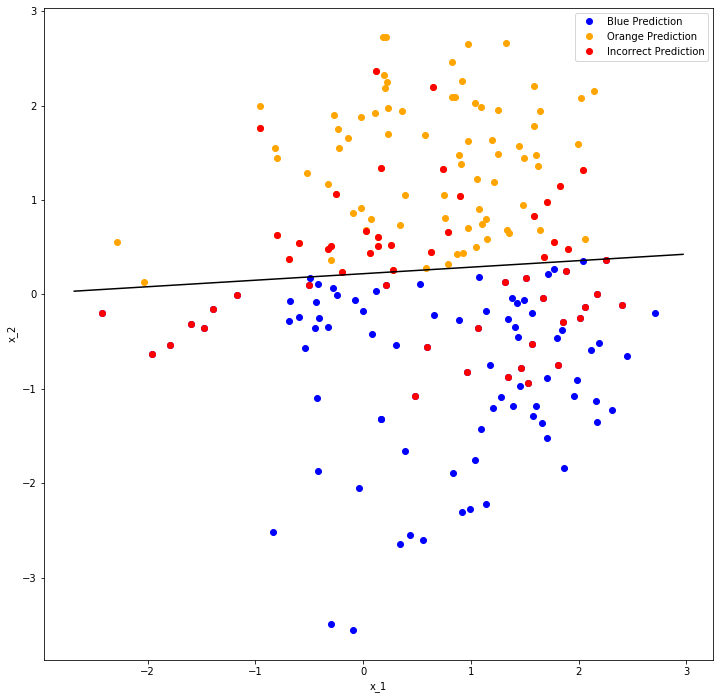

In [20]:
# plot
plt.figure(figsize=(12, 12))

x=pred_blue['x_1']
y=pred_blue['x_2']
plt.plot(x,y,'o',c='blue',label='Blue Prediction')

x=pred_orange['x_1']
y=pred_orange['x_2']
plt.plot(x,y,'o',c='orange',label='Orange Prediction')

x=bad_predict['x_1']
y=bad_predict['x_2']
plt.plot(x,y,'o',c='red',label='Incorrect Prediction')

plt.xlabel('x_1')
plt.ylabel('x_2')

plt.legend()

plt.plot([plot_x_min, plot_x_max], [ols_line_y_min, ols_line_y_max], color='black')

plt.show()

In [21]:
print("Prediction accuracy: ",(200-len(bad_predict))/200)

Prediction accuracy:  0.72


#### Book response to the example
In the case of mixtures of tightly clustered Gaussians, as we have examined, a linear decision boundary is unlikely to be optimal, and in fact is not. The optimal decision boundary is nonlinear and disjoint, and as such will be much more difficult to obtain.

| Theoretical Scenario of How Data Above Were Generated | Response to a using a Linear Model | 
| --- | --- | 
| The training data in each class (BLUE/ORANGE) were generated from bivariate Gaussian distributions with uncorrelated components and different means. | Linear decision boundary is the best we can do (more in Chapter 4). The region of overlap is inevitable, and future data to be predicted will be plagued by this overlap as well. |
| The training data in each class came from a mixture of 10 low variance Gaussian distributions, with individual means themselves distributed as Gaussian. (What we looked at in the example above.) | A linear decision boundary is unlikely to be optimal, and in fact is not. The optimal decision boundary is nonlinear and disjoint, and as such will be much more difficult to obtain. | 

### Section 2.3.2 - Nearest Neighbor Methods

Nearest-neighbor methods use those observations in the training set $\mathcal{T}$ closest in input space to $x$ to form $\hat{Y}$.

$$
\hat{Y}(x) = \frac{1}{k}\sum_{x_i\in N_k(x)} y_i,
$$

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample.

Closeness implies a metric, which for the moment we assume is Euclidean distance. **So, in words, we find the $k$ observations with $x_i$ closest to $x$ in input space, and average their responses.**

In the example above, $\hat{Y}$ would be the proportion of *orange* in the neighborhood, and so assigning class *orange* to a value in $\hat{G}$ if $\hat{Y} >  0.5$ amounts to a majority vote in the neighborhood. (There were more *orange* than *blue* in the 15 nearest points.)

This makes the decision boundary between *orange* and *blue* far more irregular but it can also respond to local clusters where one class dominates.

#### Programming this approach on the data above

Recall that we are using data that was generated as follows:

* 10 means $m_k$ were drawn from a bivariate Gaussian distribution $\mathcal{N}((1,0),I)$ and labeled BLUE.
* 10 more were drawn from $\mathcal{N}((0,1),I)$, and labeled ORANGE.
* For each class, BLUE and ORANGE, 100 observations were generated as follows:
    * A mean, $m_k$, was picked at random with probability 1/10;
    * An observation was drawn from $\mathcal{N}(m_k,I/5)$, thus leading to a mixture of Gaussian clusters for each class.
    
The task is to create a classifier that, based on the 15 nearest neighbors, determines whether a point is ORANGE or BLUE. (This is a little strange because the test set is also the training set.)

In [22]:
# Define a k-nearest-neighbor function
#  inputs: k (integer)
#  point: the point we are classifying (np.ndarray)
#  data_x: the underlying data x_1 and x_2 (data we already have from example above)
#  data_y: the classifications of all points in data_x (data we already have from example above)
# returns the average class (data_y value) of the closest k points by distance
def knn(k: int, point, data_x, data_y) -> float:
    # make point a numpy array
    if not isinstance(point, np.ndarray):
        point = np.array(point)
    
    # compute the distance to each element in data_x and append the class assignment data_y
    distances=[]
    for x,y in zip(data_x,data_y):
        distances.append((sum((x - point)**2), y))
    
    # sort distances closest -> farthest
    distances.sort()
    
    # return the average class of the closest k points by distance
    return sum(y for _, y in distances[:k])/k

In [23]:
# Now we can compute the kNN graph for k = 15

# Compute a .1 degree grid over which the KNN assignment can be generated
knn_grid = np.array([(i, j)
                     for i in np.arange(plot_x_min, plot_x_max, .05)
                     for j in np.arange(plot_y_min, plot_y_max, .05)])

# Compute the kNN result for k = 15 for each grid point
knn15_result = np.array([
    (i, j, knn(15, (i, j), data_x, vec_y))
    for i, j in knn_grid
])

In [24]:
# Filter out the blue and orange results for plotting
knn15_blue=[]
knn15_orange=[]
for result in knn15_result:
    if result[2] >= 0.5:
        knn15_orange.append(result)
    else:
        knn15_blue.append(result)
knn15_blue = np.array(knn15_blue)
knn15_orange = np.array(knn15_orange)

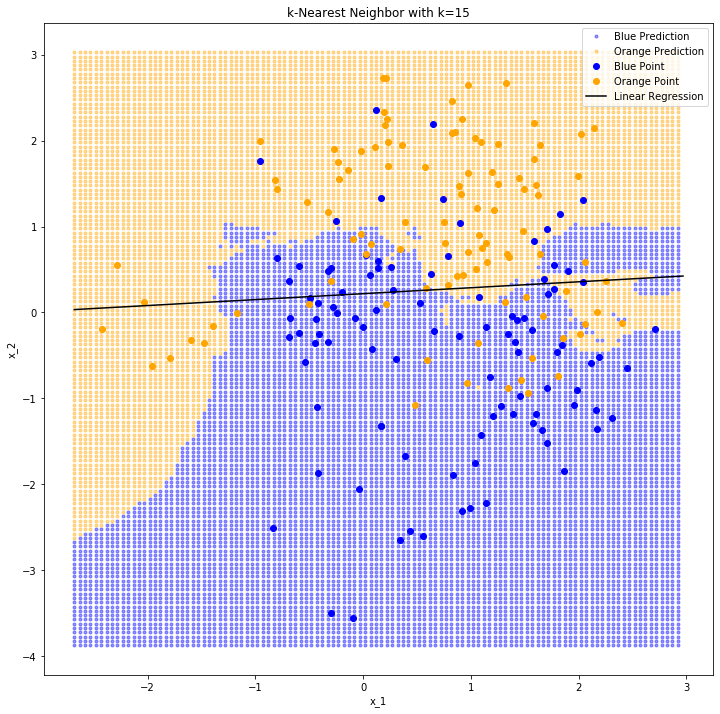

In [25]:
# Plot the data
plt.figure(figsize=(12, 12))

x=knn15_blue[:,0]
y=knn15_blue[:,1]
plt.plot(x,y,'.',c='blue',label='Blue Prediction',alpha=0.4)

x=knn15_orange[:,0]
y=knn15_orange[:,1]
plt.plot(x,y,'.',c='orange',label='Orange Prediction',alpha=0.4)

x=sample_blue[:,0]
y=sample_blue[:,1]
plt.plot(x,y,'o',c='blue',label='Blue Point')

x=sample_orange[:,0]
y=sample_orange[:,1]
plt.plot(x,y,'o',c='orange',label='Orange Point')

plt.xlabel('x_1')
plt.ylabel('x_2')

plt.plot([plot_x_min, plot_x_max], [ols_line_y_min, ols_line_y_max], color='black',label="Linear Regression")

plt.title("k-Nearest Neighbor with k=15")

plt.legend()

plt.show()

#### Results

We see that the decision boundaries that separate the blue from the orange regions are far more irregular, and respond to local clusters where one class dominates.

#### Now we can compute the graph for kNN with k = 1

In [26]:
# Compute the kNN result for k = 1 for each grid point
knn1_result = np.array([
    (i, j, knn(1, (i, j), data_x, vec_y))
    for i, j in knn_grid
])

In [27]:
# Filter out the blue and orange results for plotting
knn1_blue=[]
knn1_orange=[]
for result in knn1_result:
    if result[2] >= 0.5:
        knn1_orange.append(result)
    else:
        knn1_blue.append(result)
knn1_blue = np.array(knn1_blue)
knn1_orange = np.array(knn1_orange)

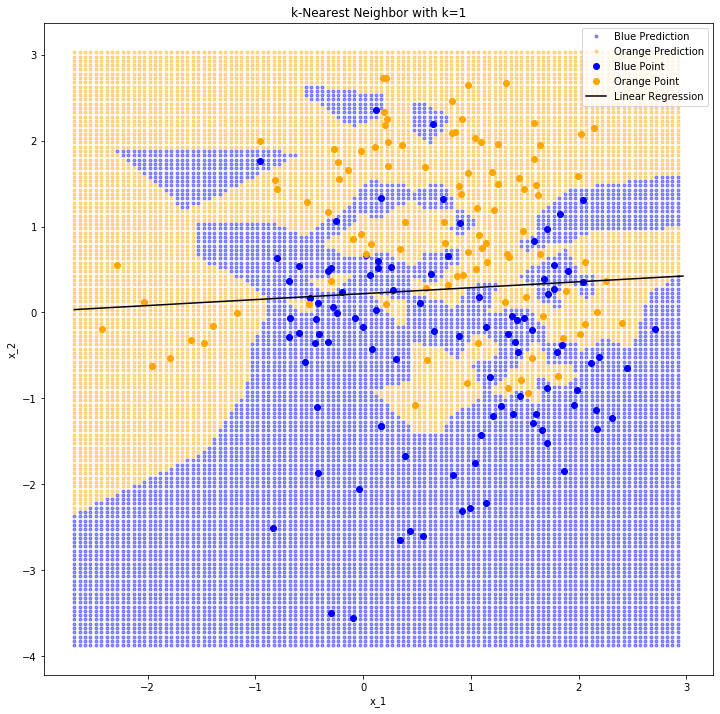

In [28]:
# Plot the data
plt.figure(figsize=(12, 12))

x=knn1_blue[:,0]
y=knn1_blue[:,1]
plt.plot(x,y,'.',c='blue',label='Blue Prediction',alpha=0.4)

x=knn1_orange[:,0]
y=knn1_orange[:,1]
plt.plot(x,y,'.',c='orange',label='Orange Prediction',alpha=0.4)

x=sample_blue[:,0]
y=sample_blue[:,1]
plt.plot(x,y,'o',c='blue',label='Blue Point')

x=sample_orange[:,0]
y=sample_orange[:,1]
plt.plot(x,y,'o',c='orange',label='Orange Point')

plt.xlabel('x_1')
plt.ylabel('x_2')

plt.plot([plot_x_min, plot_x_max], [ols_line_y_min, ols_line_y_max], color='black',label="Linear Regression")

plt.title("k-Nearest Neighbor with k=1")

plt.legend()

plt.show()

Using k=1, also called a *Voroni Tesselation*, will give each point, $x_i$ a bounding region for which it is the closest input point. 
* For all points $x$ in the region, the estimated class will be equal to the class of the closest point, $\hat{G}(x) = g_i$.  
* The decision boundary is even more irregular than with k = 15.

With k = 15, we see that far fewer training observations are misclassified than with linear regression. This should not give us too much comfort, though, since with k = 1, none of the training data are misclassified. 
* A little thought suggests that for k-nearest-neighbor fits, the error on the training data should be approximately an increasing function of k, and will always be 0 for k = 1. 
* An independent test set would give us a more satisfactory means for comparing the different methods.
* We cannot use sum-of-squared errors on the training set as a criterion for picking k, since we would always pick k = 1!

The effective number of parameters of k-nearest neighbors is the number of training points over k ($N/k$) and is generally bigger than the $p$ parameters used in least squares fits.  
* This means that the effective number of parameters decreases with increasing k. To get an idea of why, note that if the neighborhoods were nonoverlapping, there would be $N/k$ neighborhoods and we would fit one parameter (a mean) in each neighborhood.

It would seem that k-nearest-neighbor methods would be **more appropriate for the mixture Scenario 2 described above**, while for Gaussian data the decision boundaries of k-nearest neighbors would be unnecessarily noisy.

### Section 2.3.3 - From Least Squares to Nearest Neighbors

The linear decision boundary from least squares is very smooth, and apparently stable to fit. 
* It does appear to rely heavily on the assumption that a linear decision boundary is appropriate. 
* In language we will develop shortly, it has **low variance and potentially high bias**.

On the other hand, the k-nearest-neighbor procedures do not appear to rely on any stringent assumptions about the underlying data, and can adapt to any situation. 
* However, any particular subregion of the decision boundary depends on a handful of input points and their particular positions, and is thus wiggly and unstable—**high variance and low bias**.

A misclassification curve can be generated to show the error across the training and test data set for different values of k.
* See Figure 2.4 in the text.

#### Applications and Enhancements
A large subset of the most popular techniques in use today are variations of k-NN and linear regression. 
* The 1-NN algorithm "captures a large percentage of the market for low dimensional problems.

You can enhance these methods in a variety of ways, for example:
* Kernel methods use weights that decrease smoothly to zero with distance from the target point, rather than the effective 0/1 weights used by k-nearest neighbors.
* In high-dimensional spaces the distance kernels are modified to emphasize some variable more than others.
* Local regression fits linear models by locally weighted least squares, rather than fitting constants locally.
* Linear models fit to a basis expansion of the original inputs allow arbitrarily complex models.
* Projection pursuit and neural network models consist of sums of nonlinearly transformed linear models.

### Section 2.4 - Statistical Decision Theory

This is theory that helps us develop models like linear regression and k-NN.

#### The case of quantitative output 
We have:
  * The input, $X \in \mathbb{R}^p$, a real valued random input vector
      * This is just a generalization of input variables into p dimensions.
  * The output, $Y \in \mathbb{R}$, a real valued random output variable 
      * Output variable y
  * Joint probability distribution, $Pr(X,Y)$
      * We are assuming we have $(x_1,y_1)...(x_N,y_N)$ called the *training data* and that there is an underlying, and fixed, probability distribution relating $x$ and $y$. We don't know this probability distribution apriori.
      
We seek:
  * A function, $f(x)$, for predicting $Y$ given values of $X$.
      * $f(x)$ : Takes inputs which are in $\mathbb{R}^p$ space and maps them to outputs on the real number line $\mathbb{R}$
      * $f(x)$ could be a straight line as in linear regression
          * $\hat{y} = f(x) = \beta_o + \beta_{1}x_1 + \beta_{2}x_2 + ... + \beta_{p}x_p = \beta_o+\sum_{i=1}^{p}\beta_{i}x_i$
          * Think of $x_1,x_2,x_3...x_p$ as the input coordinates, for example age, income, credit score.
      * $f(x)$ could be a local average as in k-NN
          * $\hat{y} = f(x) = \frac{1}{k}\sum_{x_i \in N(x)}^{k} y_i$
          * This is the average of the k closest points ($x_1,x_2,x_3...x_k$) to the input x.
In both of the above cases, linear regression and k-NN, we needed to know what kind of model we were going to fit the data to before we started doing any generalizations.

In order to decide what kind of model we should use, we need:

* A *loss function*, $L(Y,f(X))$ for penalizing errors in prediction. Goal is to find an $f(x)$ such that the loss function is minimized.
    * One of the most common loss functions is *squared error loss*:  $L(Y,f(X)) = (Y - f(X))^2$

* This leads us to a criterion for choosing f called the **expected (squared) prediction error**.
    * $EPE(f) = E(Y - f(X))^2 = \int[y - f(x)]^2 Pr(dx,dy)$

There is a lot more fancy math to essentially say:

The best prediction of $Y$ at any point $X$ is the conditional mean.
* A global mean in the case of linear regression
* A local mean in the case of k-NN

#### k-NN

When you have a large sample size $N$ and few dimensions $p$, then points in the nearest neighborhood are likely to be close. 

And as k gets large, the local average will be more stable. As $N,K$ --> $\infty$ such that $k/N$ --> $0$ the expectation simply becomes the expected value of $Y$ conditioned on $X = x$, $\hat{f}(x)$ --> $E(Y|X = x)$.

#### Linear Regression

Assume that the regression function is linear in its arguments, $f(x) \approx x^T\beta$. This is called a *model based approach* since we specify a model for the linear function.

> both k-nearest neighbors and least squares end up approximating conditional expectations by averages.

Least squares and k-NN differ in terms of their assumptions
* Least squares assumes $f(x)$ is well approximated by a globel linear function
* k-NN assumes $f(x)$ is well approximated by a locally constant function

#### The case of categorical output

Same paradigm but need a different loss function.

An estimate $\hat{G}$ will assume values in $G$, the set of possible classes. Therefore the loss function can be represented by a K by K matrix, **L** where K is the dimensionality of $G$. (e.g. If there are 2 classes, **L** will be a 2 x 2 matrix.)

* **L**(k, j) is the price paid for classifying an observation belonging to class $G_k$ as $G_j$
* This means that **L** is zero on the diagonal because the prediction is right here and nonnegative elsewhere
* Most often used is the *zero-one loss function* where all misclassifications are charged a single unit. (i.e. Zeros on the diagonal and ones everywhere else.)

With some fancy math we get to:

$$ \hat{f}(x) = argmin_g \sum_{k=1}^k L(k,g)Pr(k | X = x) $$

##### Example
   * Assume the zero-one loss function and a prediction is being made in a three-class problem (e.g. buy | sell | hold)
       * P(1,x) = 0.6
       * P(2,x) = 0.2
       * P(3,x) = 0.2
   * If we predict g = 2, we get $\sum ((1 * 0.6) + (0 * 0.2) + (1 * 0.2)) = 0.8 $
       * Working through middle row on 3 x 3 loss matrix, **L**.
   * If we predict g = 1, we get $\sum ((0 * 0.6) + (1 * 0.2) + (1 * 0.2)) = 0.4 $
   * If we predict g = 3, we get $\sum ((1 * 0.6) + (1 * 0.2) + (0 * 0.2)) = 0.8 $
   * We should pick g for which the loss the lowest, in this case class 1.

Or, in other words an estimate at $x$ should be $G_k$ if the probability of $G_k$ at $x$ is the most likely, or maximum probability, given the probability distribution at the point $x$.

* $\hat{G}(x) = G_k$ if $Pr(G_k | X = x) = max_{g \in G}Pr(g|X=x) $

* This is known as the *Bayes classifier* and says that we classify to the most probable class using the conditional distribution $Pr(G | X)$.
* The error rate of the Bayes classifier is called the *Bayes rate*.

The k-nearest neighbor classifier directly approximates the Bayes solution — a majority vote in a nearest neighborhood amounts to exactly this, except that conditional probability at a point is relaxed to conditional probability within a neighborhood of a point, and probabilities are estimated by training-sample proportions.

I found the following lectures helpful when studying this section. There may be better ones, but this is just what I found with a quick search.
* [Part I - Regression](https://www.youtube.com/watch?v=q8i-WKtkQ6I)
* [Part II - Classification](https://www.youtube.com/watch?v=BwbBEK_lmkA)

### Section 2.5 Local Methods in High Dimensions

It would seem that we could use k-NN averaging in any data set with sufficient N, however, this approach breaks down in high dimensions in a phenomena commonly referred to as the *curse of dimensionality*. 

Imagine you wanted to capture a fraction _r_ of observations around any data point. How long would an edge, _e_ need to be in any dimension?

We know that edge length, $e = r^{\frac{1}{p}}$

| Dimensions, $p$ | edge length to capture 1% | edge length to capture 10% | Notes | 
| ---- | ---- | ----- | --- | 
| 2  | .1  | .32| To capture 1% of the data to form a local average, we must cover 10% of the range of each input variable. | 
| 3  | .22 | .46 | To capture 10% of the data to form a local average, we must cover 46% of the range of each input variable.| 
| 4  | .31 | .56 | | 
| 5  | .4  | .63 | | 
| 10 | .63 | .79 | | 

Such neighborhoods are no longer “local.” 

Reducing _r_ dramatically does not help much either, since the fewer observations we average, the higher is the variance of our fit.

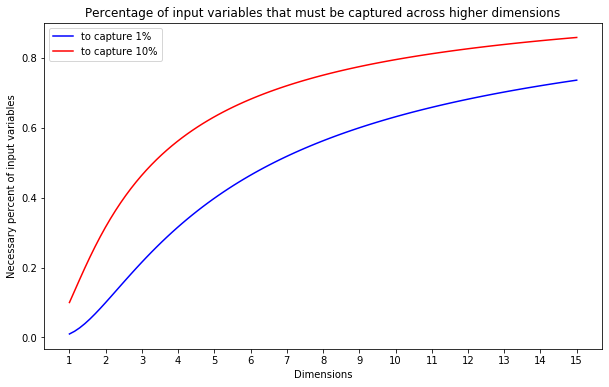

In [29]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(1,15,100)
one_percent = (0.01) ** (1/p)
ten_percent = (0.10) ** (1/p)

%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(p,one_percent,c='blue',label='to capture 1%')
plt.plot(p,ten_percent,c='red',label='to capture 10%')
plt.xticks(np.arange(1, 16))
plt.xlabel('Dimensions')
plt.ylabel('Necessary percent of input variables')
plt.legend()
plt.title('Percentage of input variables that must be captured across higher dimensions')
plt.show()

Another consequence of the sparse sampling in high dimensions is that all sample points are close to an edge of the sample.
   * For example, consider a sample size of 500 points, centered at the origin, in p = 10 dimensions, 
       * the median distance from the origin to the closest data point is 0.52, more than halfway to the boundary.
   * Most data points are closer to the boundary than any other data point
   * Prediction is more difficult near an edge
    * Requires extrapolation from nearby points versus interpolation between them

Another manifestation of the curse is that the sampling density is proportional to $N^{1/p}$. 
   * Thus, if $N_1 = 100$ represents a dense sample for a single input problem, then $N_{10} = 100^{10}$ is the sample size required for the same sampling density with 10 inputs. 
   * Thus in high dimensions all feasible training samples sparsely populate the input space.

Good quote from [an article on the bias-variance tradeoff](https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9):
> A simplistic model in few dimensions is very robust to changes in training data \[has low variance\], but a more complex is not. On other hand, the deviation of $\hat{f}(x)$ from $f(x)$ on average (the bias), is larger for more simplistic models, since our assumptions are not as representative of the underlying true relationship $f$.

### Section 2.6 - Statistical Models, Supervised Learning, and Function Approximation

#### Review

Goal is to find a useful approximation $\hat{f}(x)$ to $f(x)$ that captures the underlying relationship between inputs and outputs.

In a quantitative response, squared error loss led us to the regression function, $f(x) = E(Y|X=x$).
* KNN can be viewed as a direct estimate of this expectation

Two important notes on KNN
1. If the dimension of the input space is high, the nearest neighbor will often be far away (see above).
2. If special structure is known to exist, this can be used to reduce bias and variance of the estimates.

This section discusses another class of model for $f(x)$ that is designed to overcome the dimensionality problem.

#### Section 2.6.1 - A statistical model for the joint distribution $Pr(X,Y)$

##### Additive Error Models

Suppose that our data arose from a statistical model, $Y = f(X) + \epsilon$ where $E(\epsilon) = 0$ and is independent of $X$.

Note that for this model, $f(x) = E(Y|X=x)$ and that the conditional probability distribution, $Pr(Y|X)$ depends on $X$ only through the conditional mean $f(x)$.

The additive error model is a useful approximation for the truth. For most systems, the input output pairs, $(X,Y)$, will not have a deterministic relationship, $Y = f(X)$. Generally, there will be other unmeasured input variables that also contribute to $Y$, including measurement error.

The additive model assumes we can capture all these departures from a deterministic relationship via the error, $\epsilon$.

###### Deterministic systems

For other systems, a deterministic relationship does hold. Many classification problems are of this form.

The training data consist of colored examples from the map ${x_i,g_i}$, and the goal is to be able to color any point. Here, the function is deterministic, and the randomness enters through the $x$ location of the training points.

This isn't the focus of this section.

##### Independence and Identically distributed assumption

The assumption that the errors in an addtive model are independent and identically distributed is not strictly necessary. 

For example, we can have $Var(Y | X = x) = \sigma(x)$, and now both the mean and variance depend on $X$.

In general, the probability distribution $Pr(X,Y)$ can depend on $X$ in complicated ways, but the additive model precludes these.

##### Qualitative responses

Additive error models are typically not used for qualitative outputs, $G$. In this case, the target function $p(X)$ *is* the conditional density, $Pr(G|X)$, and this is modeled directly. 

For example, for two-class data, it is often reasonable to assume that the data arise from independent binary trials, with the probability of one particular outcome being $p(X)$ and the other $1-p(X)$. Thus if $Y$ is the 0–1 coded version of $G$, then $E(Y |X = x) = p(x)$, but the variance depends on x as well: $Var(Y |X = x) = p(x)[1 − p(x)]$.

#### Section 2.6.2 - Supervised learning

Let's consider the function fitting paradigm from a machine learning point of view.

Suppose that the additive error model, $Y = f(x) + \epsilon$ is a reasonable assumption.

Then supervised learning attempts to learn $f$ through a *teacher* (a set of observed training data points). 

The observed inputs are fed into a *learning algorithm* which produces outputs in response to each input.

The learning algorithm has the property that it can modify its input/output relationship, $\hat{f}$, in response to differences between the original and generated outputs, $y_i - f(x_i)$.

This process is known as *learning by example* and, upon completion, the hope is that the artificial and real outputs will be close enough to be useful for all sets of inputs likely to be encountered in practice.

#### Section 2.6.3 - Function approximation

Contrast the section above with *function approximation* where it is assumed that:

1. All data pairs ($input_i,output_i$) are viewed as points in a $(p+1)$-dimensional Euclidean space.
2. The function $f(x)$ has domain equal to the $p$-dimensional input subspace ($\mathbb{R}^p$).
3. $f$ is related to the data via a model, such as $y_i = f(x_i) + \epsilon$

But the goal is similiar, obtain a useful approximation to $f(x)$ given the training data.

> Although somewhat less glamorous than the learning paradigm, treating supervised learning as a problem in function approximation encourages the geometrical concepts of Euclidean spaces and mathematical concepts of probabilistic inference to be applied to the problem. **This is the approach taken in this book.**


The outputs of this process are a set of parameters $θ$ that can be modified to suit the data at hand. For example,
the linear model $f(x) = x^T\beta$ has $θ = \beta$. 


### Section 2.7 - Structured Regression Models

We have seen that kNN and other local methods face problems in high dimensions but they may also be inappropriate in low dimensions.

This is the case where more structured approaches can make more efficient use of the data.

This section introduces classes of such structured approaches. 

#### Section 2.7.1 - Difficulty of the problem

Minimizing the residual sum of squares function, $RSS(f) = \sum_{i=1}^{N}(y_i - f(x_i))^2$, leads to infinitely many solutions: any function $\hat{f}$ passing through the points $(x_i,y_i)$ is a solution.

Any particular solution chosen might be a poor predictor at test points different from the training points.

In order to obtain useful results, we must restrict the set of eligible solutions. 

How to decide on the nature of the restrictions is based on considerations outside of the data. 

These restricted classes of solutions are the major topic of this book. That said, the choice of contraint doesn't eliminate the infinitely many solution problem in that there are also infinitely many constraints which could be applied and so we haven't solved the problem but transferred the ambiguity to the choice of constraint. 

Contraints are *complexity restrictions*. Generally they apply some kind of regular behavior in small neighborhoods of the input space. That is, for all input points $x$ sufficiently close to each other, the function $\hat{f}$ exhibits some special structure such as nearly constant, linear, or low-order polynomial behavior. The estimator is then obtained by averaging or polynomial fitting in that neighborhood.

The strength of a constraint is dictated by neighborhood size. The larger the neighborhood, the stronger the constraint and its effect on estimation. Local constant fits in infintesimally small neighborhoods is no constraint at all whereas linear fits in a large neighborhood is nearly a global linear model and is very restrictive.

The curse of dimensionality is real and all methods that overcome the dimensionality problems have an associated—and often implicit or adaptive—metric for measuring neighborhoods, which basically does not allow the neighborhood to be simultaneously small in all directions.

### Section 2.8 - Classes of restricted estimators

Non-parametric (underlying distribution unknown) regression techniques or learning methods fall into a number of different classes depending on the nature of the restrictions imposed.

These methods are not distinct and some methods fall into several classes.

Each class has associated with it one or more parameters called *smoothing parameters* that control the effective size of the local neighborhood.

Three classes are discussed:
1. Roughness penalty and Bayesian methods
2. Kernal methods and local regression
3. Basis functions and dictionary methods

#### Section 2.8.1 - Roughness penalty and Bayesian methods

Idea: Penalize $RSS(f)$ with a function $J(f)$ that is large for functions $f$ that vary too much over a small region of input space.
* $PRSS(f,\lambda) = RSS(f) + \lambda J(f)$
    * The amount of penalty is dictated by $\lambda \ge 0$

For example, the popular cubic smoothing spline for one-dimensional inputs is the solution to the penalized least-squares criterion $PRSS(f, \lambda) = \sum_{i=1}^{N}(y_i - f(x_i))^2 + \lambda \int [f''(x)]^2 dx$
* The roughness penalty here controls large values of the second derivative of $f$, and the amount of penalty is dictated by $\lambda$. For $\lambda = 0$ no penalty is imposed, and any interpolating function will do, while for $λ = \infty$ only functions linear in $x$ are permitted.

Penalty functions are also called *regularization methods*.

#### Section 2.8.2 - Kernal methods and local regression

Nearest-neighbor methods can be thought of as kernel methods having a more data-dependent metric.  These methods of course need to be modified in high dimensions, to avoid the curse of dimensionality.

#### Section 2.8.3 - Basis functions and dictionary methods

This class of methods includes the familiar linear and polynomial expansions, but more importantly a wide variety of more flexible models. Some examples include:

* polynominal splines of degree $K$
* radial basis functions
* single layer feed forward neural networks

These adaptively chosen basis function methods are also known as *dictionary methods*.


### Section 2.9 - Model selection and the bias-variance tradeoff

All the models described above have a smoothing or complexity parameter that has to be determined, this includes:

* the multiplier of the penalty term
* the width of the kernal
* the number of basis functions

> **We cannot use residual sum-of-squares on the training data to determine these parameters since we would always pick those that gave interpolating fits and hence zero residuals. Such a model is unlikely to predict future data well at all.**

#### Bias-variance tradeoff for kNN

The k-nearest-neighbor regression fit illustrates the competing forces that affect the predictive ability of such approximations.

The expected prediction error, also known as the *test* or *generalization error* can be broken down into three components:

1. **Irreducible error** - the variance of the new test target (beyond our control even if we know the value of $f(x_0)$
2. **Bias component** of mean squared error - squared difference between the true mean $f(x_0)$ and the expected value of the estimate. This term will most likely increase with k, if the true function is reasonably smooth.  For small k the few closest neighbors will have values $f(x_{(ℓ)})$ close to $f(x_0)$, so their average should be close to $f(x_0)$. As k grows, the neighbors are further away, and then anything can happen.
3. **Variance component** of mean squared error - the variance of an average and decreases as the inverse of k.

> More generally, as the complexity of our procedure is increased, the variance tends to increase and the squared bias tends to decrease. The opposite behavior occurs as the complexity is decreased. 

For k-nearest neighbors, model complexity is controlled by k.

Typically we would like to choose our model complexity to trade bias off with variance in such a way as to minimize the test error. 

An obvious estimate of test error is the training error. Unfortunately training error is not a good estimate of test error, as it does not properly account for model complexity.

The training error tends to decrease whenever we increase the model complexity, that is, whenever we fit the data harder. With too much fitting, the model adapts itself too closely to the training data, and will not generalize well (i.e., have large test error). In that case the predictions $\hat{f}(x_0)$ will have large variance, as reflected in the third term described above.

In contrast, if the model is not complex enough, it will underfit and may have large bias, again resulting in poor generalization. 

See Chapter 7 for estimating the test error of a prediction method, and hence estimating the optimal amount of model complexity for a given prediction method and training set.